In [1]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
import pandas as pd
import plotly.express as px
from scipy.stats import linregress

from functions.driver_identification import identify_drivers
# opening STAC catalog

catalog = pystac_client.Client.open(
    #"https://storage.googleapis.com/dgds-data-public/coclico/coclico-stac/catalog.json" # cloud API
    r"p:\1000545-054-globalbeaches\15_GlobalCoastalAtlas\coclicodata\current\catalog.json" # P drive API 
)

In [2]:
href = catalog.get_child("shore_mon_hr").assets["data"].href
ds_hr = xr.open_zarr(href)

In [3]:
id_class = identify_drivers(ds= ds_hr, transect= 'BOX_165_065_144')

In [4]:
id_class.fill_timeseries()

,BOX_165_065_144
1984-05-01,-13.841923
1984-06-01,-15.584545
1984-07-01,-11.195173
1984-08-01,-11.195173
1984-09-01,-11.190151
...,...
2021-08-01,151.953354
2021-09-01,139.588146
2021-10-01,139.583358
2021-11-01,151.953354


[0.94339623]


{'Ds': 16.0,
 'Ps': 365.0,
 'r2': 0.73,
 'Width_fit': [[10, 4]],
 'Width_data': [[9, 3]],
 'Taccr': 151,
 'Pmis2013': array([0.94339623]),
 'Y2013': 9}

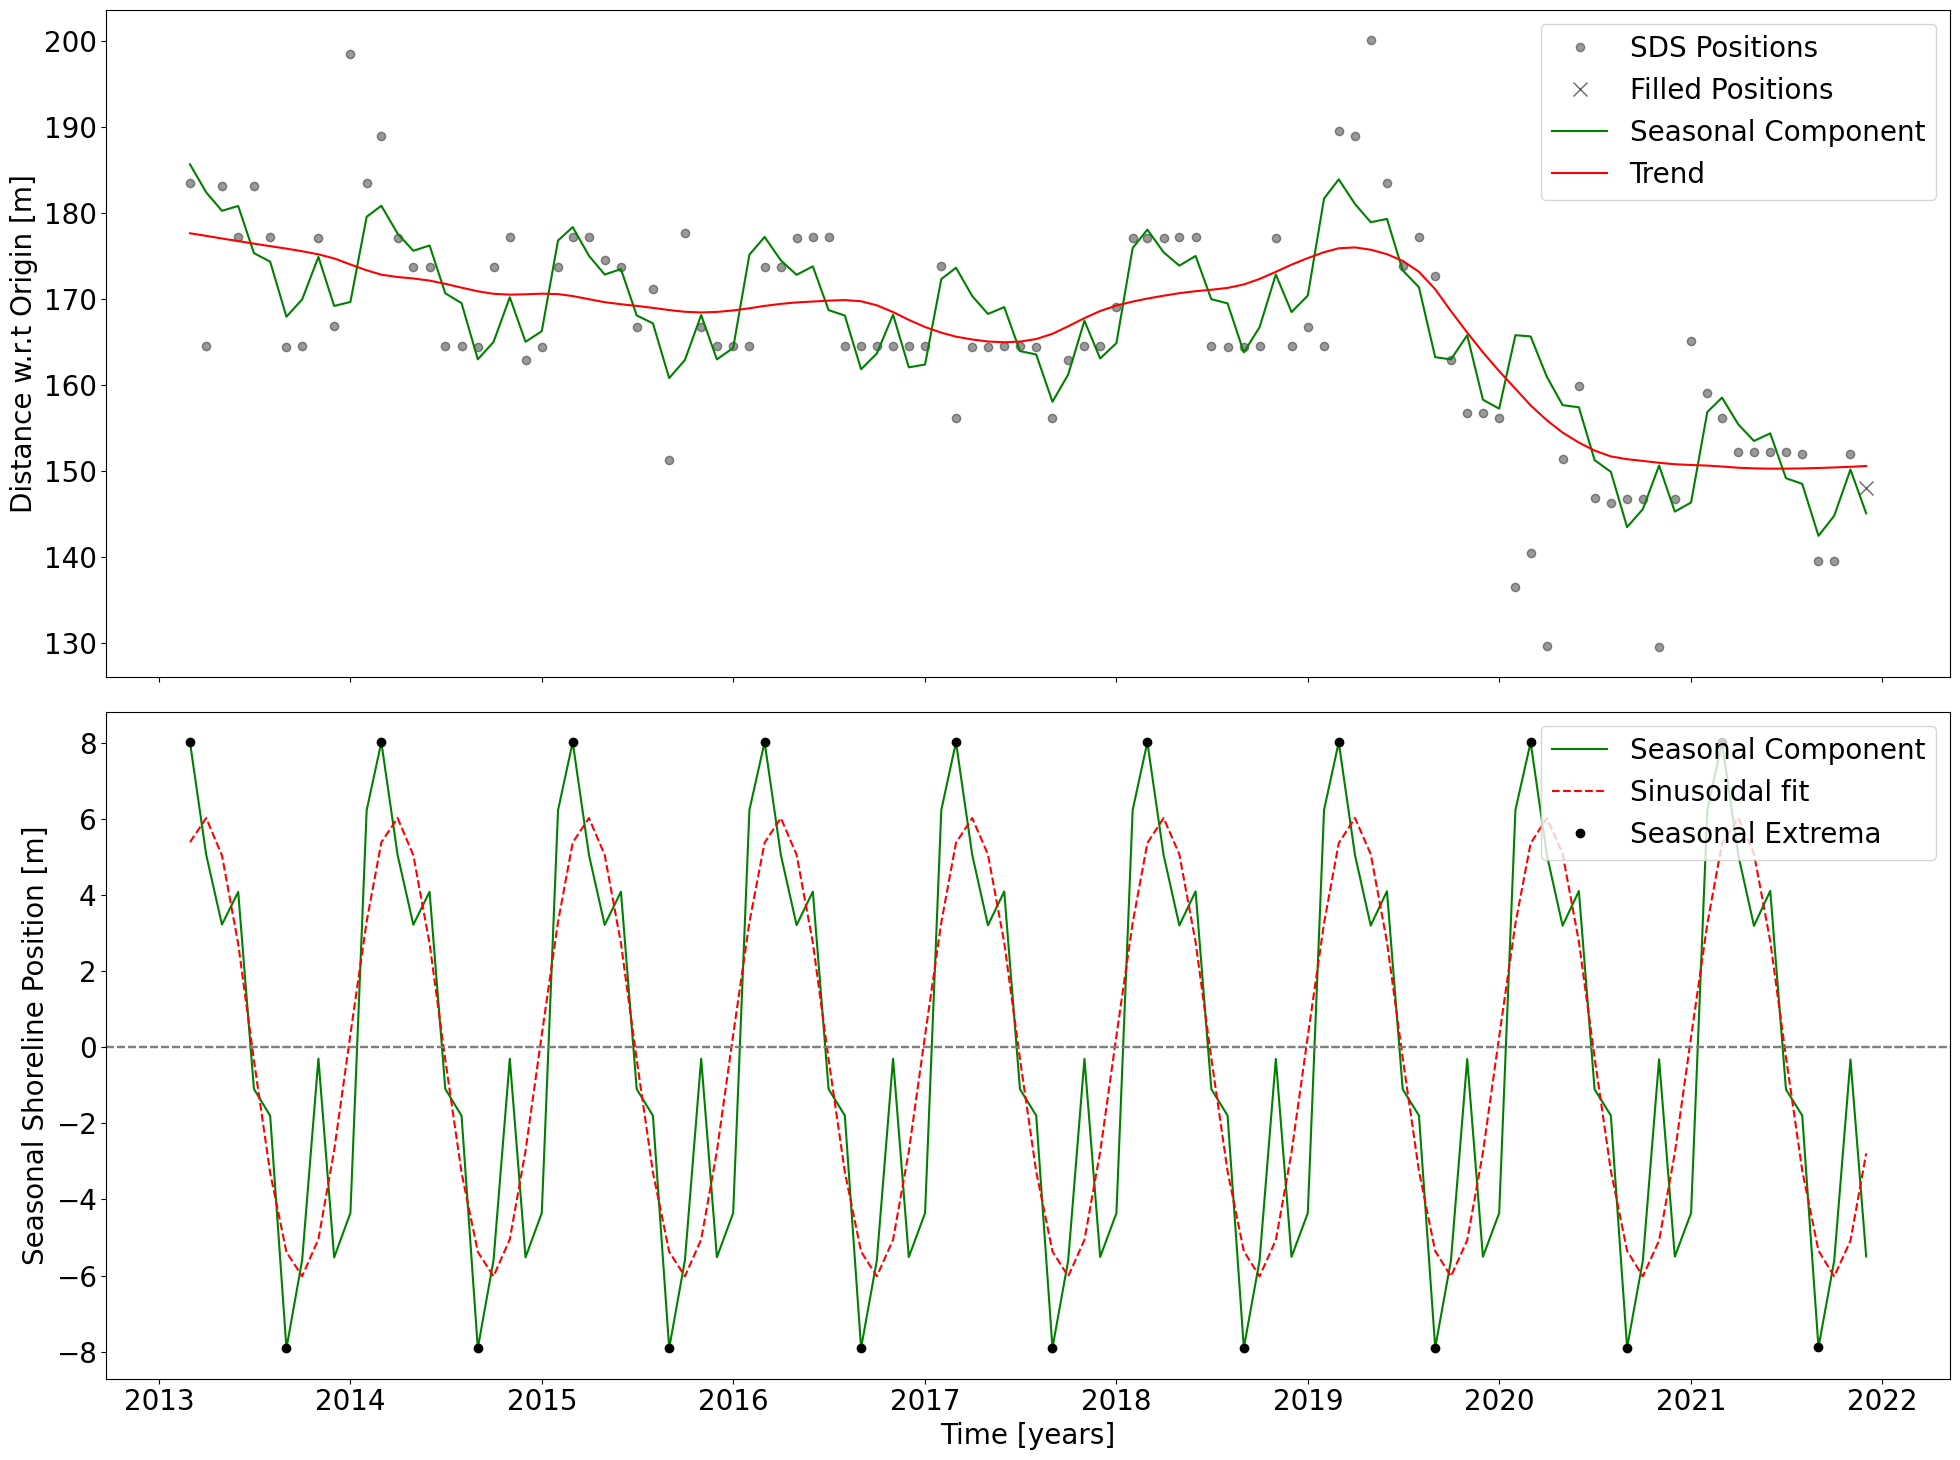

In [5]:
id_class.seasonality()